<a href="https://www.kaggle.com/code/vijays140291/bank-churn-prediction?scriptVersionId=162061409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#loading the dataset 
df_train=pd.read_csv('/kaggle/input/bank-churn/train.csv')
df_test=pd.read_csv('/kaggle/input/bank-churn/test.csv')
df=pd.concat([df_train,df_test],axis=0)
df=df.drop(df.columns[0:3],axis=1)

In [3]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,NaN
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,NaN
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,NaN
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,NaN


In [4]:
df.isna().sum()

CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,165034.000000
mean,656.484939,38.124415,5.010867,55420.296450,1.554002,0.753589,0.496755,112470.952558,0.211599
std,80.188100,8.864927,2.806173,62805.933171,0.546178,0.430921,0.499990,50286.608747,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117848.090000,0.000000
75%,710.000000,42.000000,7.000000,120037.960000,2.000000,1.000000,1.000000,154871.130000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for col in categorical_cols:
    print(df[col].value_counts())

Geography
France     157386
Spain       60126
Germany     57545
Name: count, dtype: int64
Gender
Male      155092
Female    119965
Name: count, dtype: int64
HasCrCard
1.0    207280
0.0     67777
Name: count, dtype: int64
IsActiveMember
0.0    138421
1.0    136636
Name: count, dtype: int64


# **Exploratory Data Analysis***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


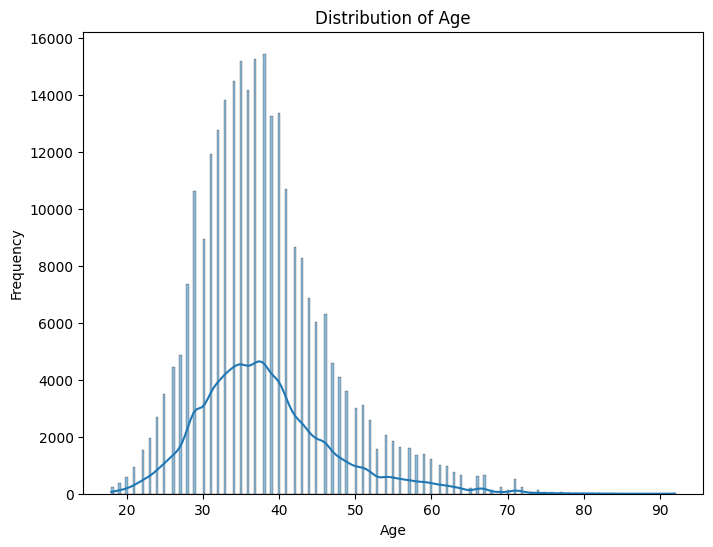

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


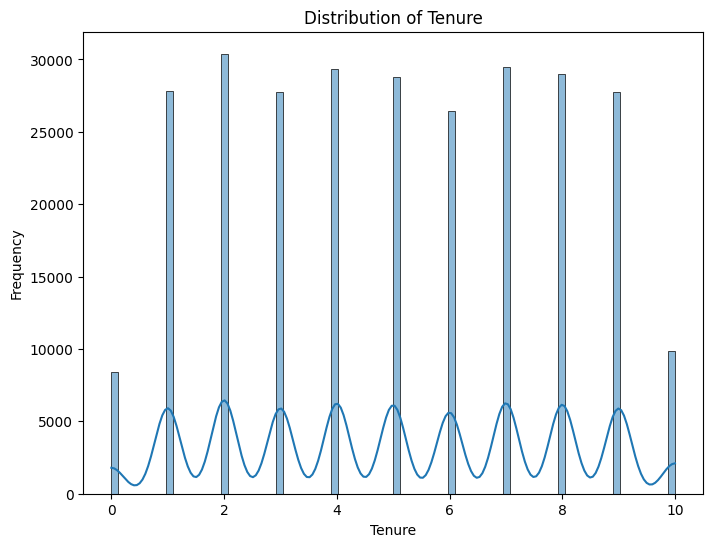

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


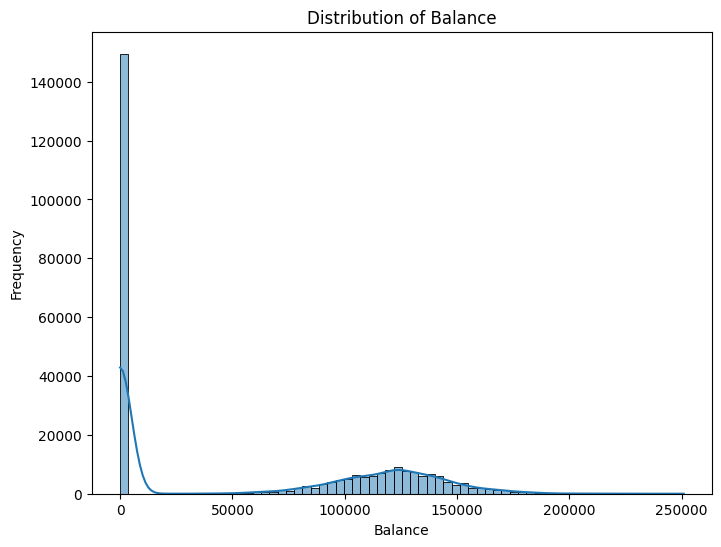

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


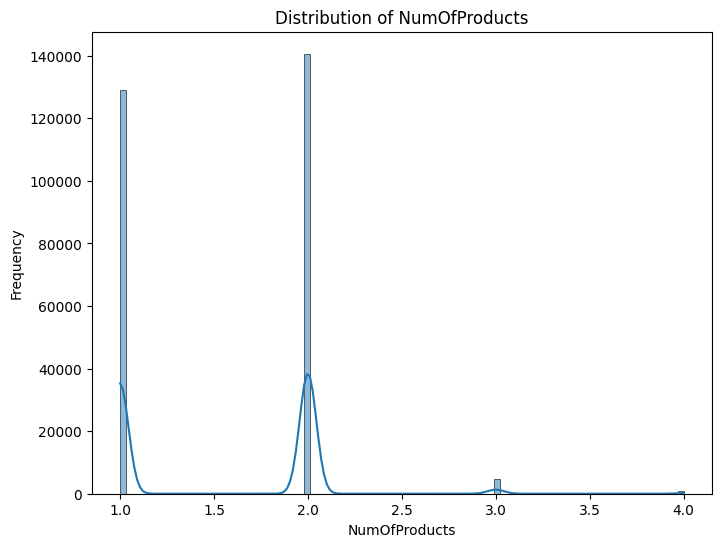

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


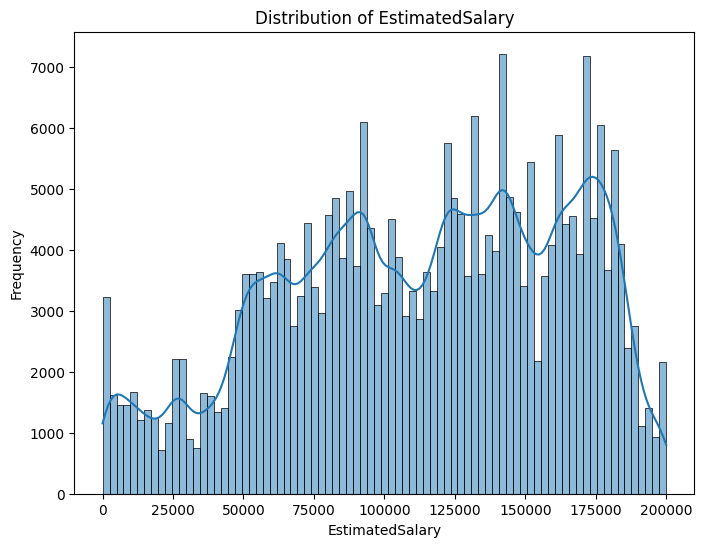

In [7]:
numerical_cols = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

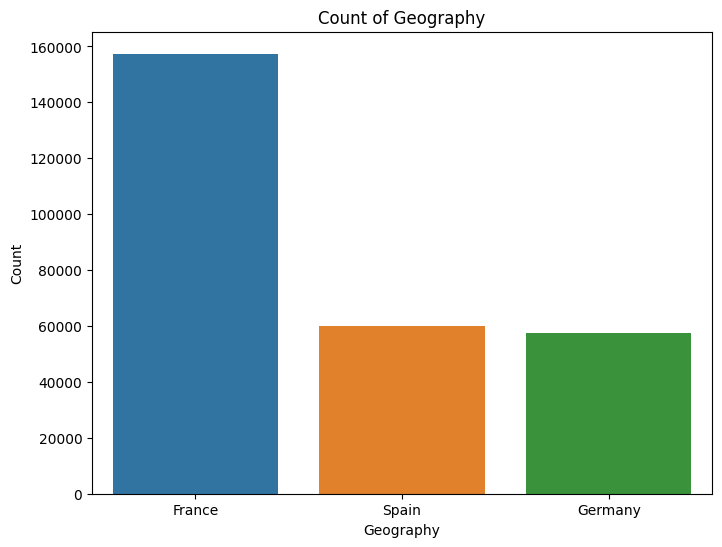

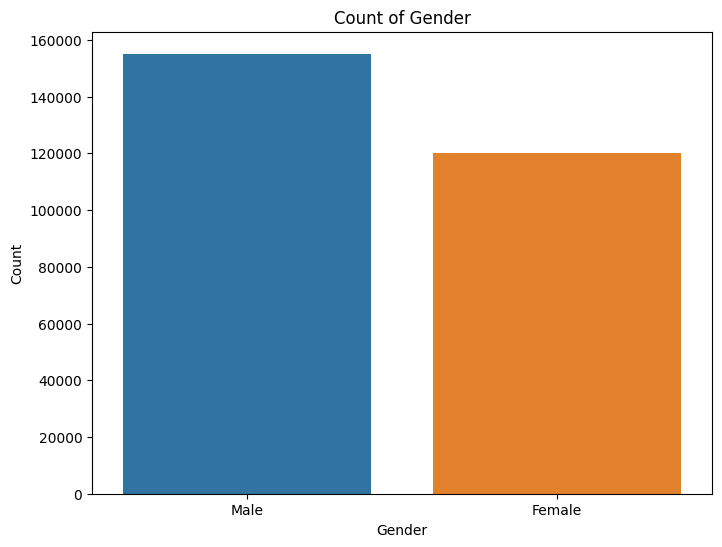

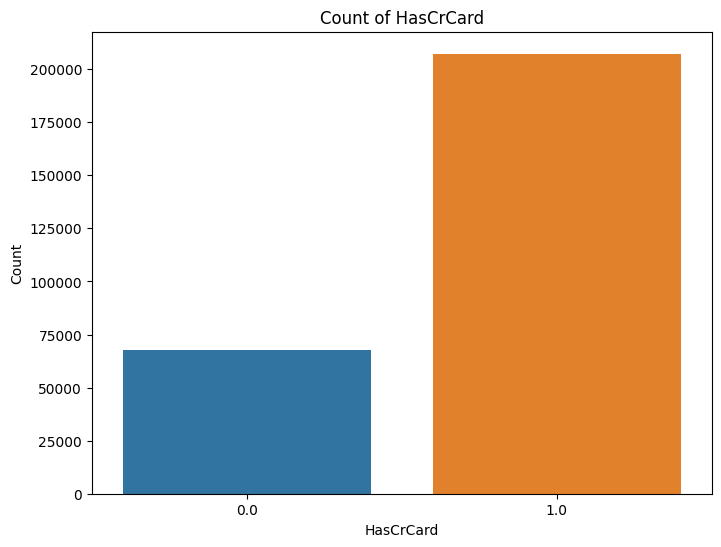

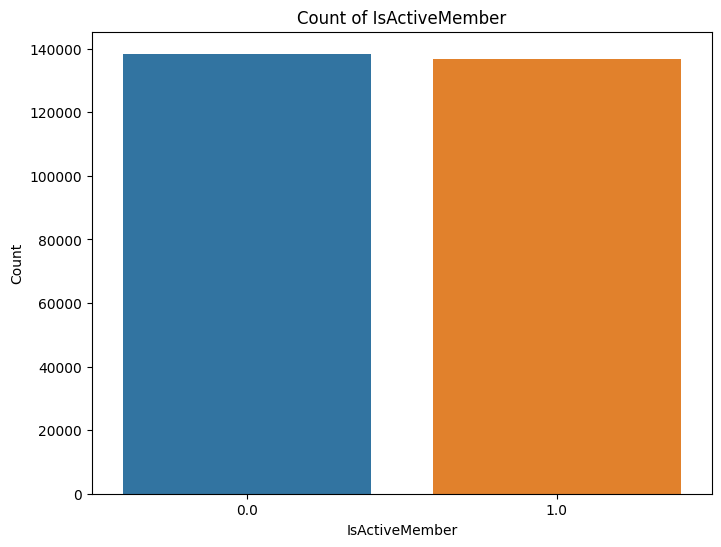

In [8]:
# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

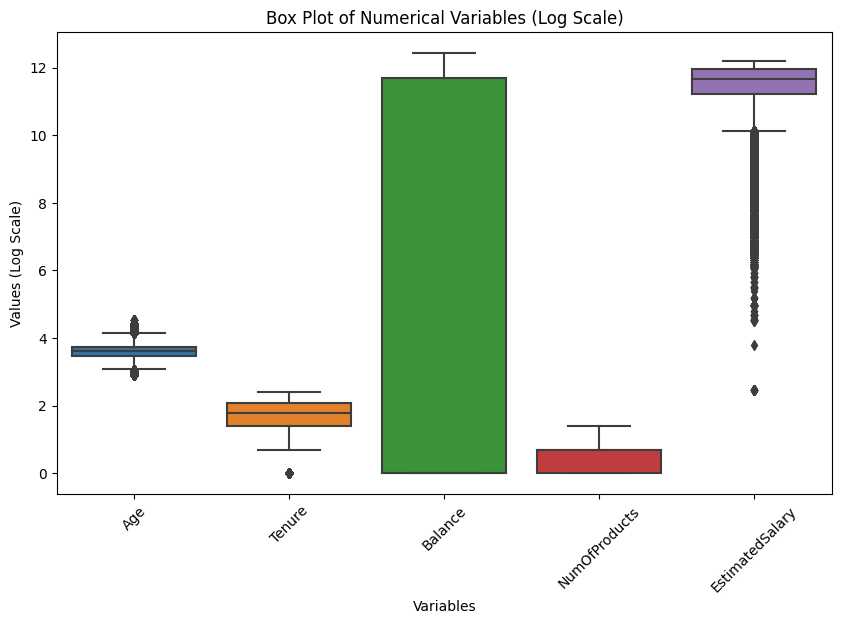

In [9]:

# Apply log transformation to numerical variables (avoiding zero values)
numerical_df_log = df[numerical_cols].apply(lambda x: np.log(x) if np.min(x) > 0 else np.log(x + 1))

# Box plot for numerical variables (log scale)
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_df_log)
plt.title('Box Plot of Numerical Variables (Log Scale)')
plt.xlabel('Variables')
plt.ylabel('Values (Log Scale)')
plt.xticks(rotation=45)
plt.show()



In [10]:
# Calculate IQR for each numerical variable
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print('Outliers:')
print(outliers)


Outliers:
Age                10640
Tenure                 0
Balance                0
NumOfProducts        779
EstimatedSalary        0
dtype: int64


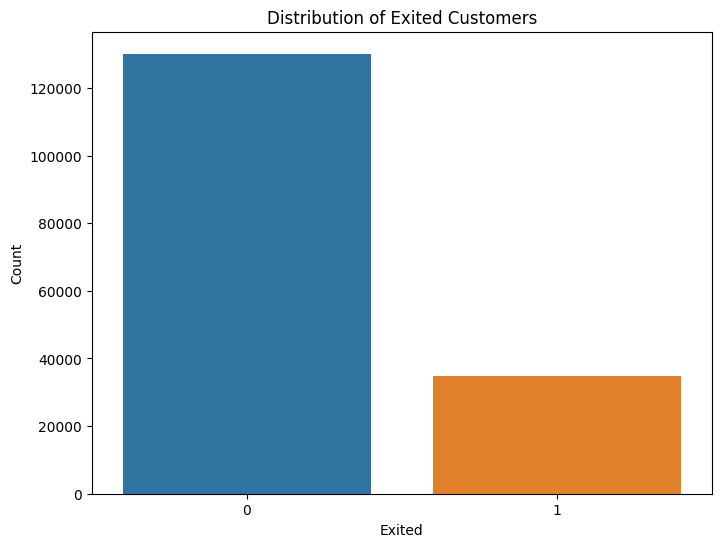

Proportion of Exited Customers:
Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64


In [11]:
# Bar plot for the target variable (Exited)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Exited')
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# Calculate the proportion of each class
exit_proportion = df_train['Exited'].value_counts(normalize=True)
print('Proportion of Exited Customers:')
print(exit_proportion)


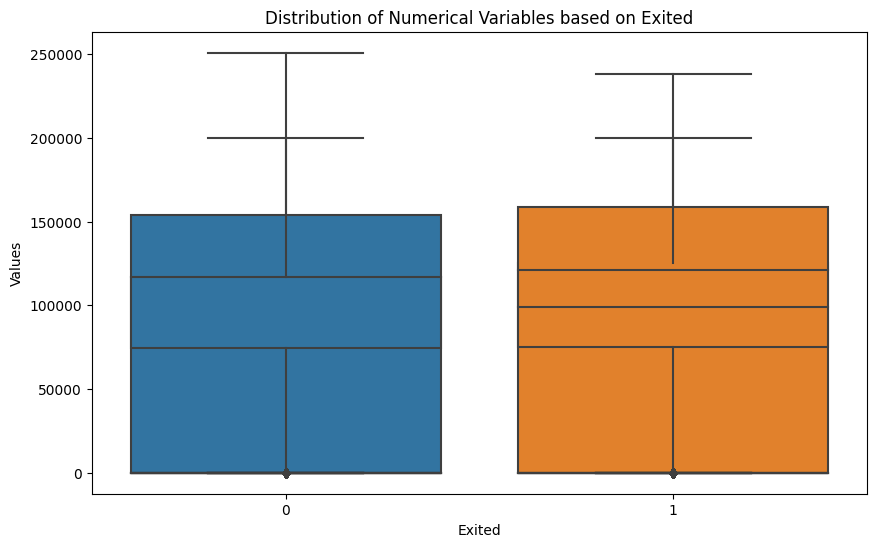

In [12]:
# Box plot for numerical variables based on the target variable
plt.figure(figsize=(10, 6))
for col in numerical_cols:
    sns.boxplot(data=df_train, x='Exited', y=col)
plt.title('Distribution of Numerical Variables based on Exited')
plt.xlabel('Exited')
plt.ylabel('Values')
plt.show()




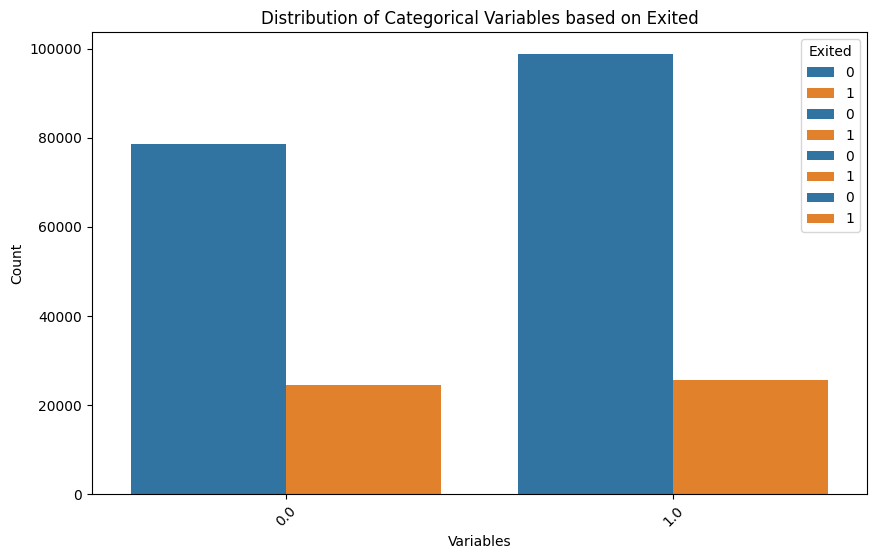

In [13]:
# Bar plot for categorical variables based on the target variable
plt.figure(figsize=(10, 6))
for col in categorical_cols:
    sns.countplot(data=df_train, x=col, hue='Exited')
plt.title('Distribution of Categorical Variables based on Exited')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Exited', loc='upper right')
plt.show()

# Feature Engineering

In [14]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [15]:
def preprocess_inputs(df_train,df_test):
    df_train=df_train.copy()
    #dropping the unnecessary columns
    df_test=df_test.copy()
    #dropping unecessary columns
  
    df_train=df_train.drop(df_train.columns[0:3],axis=1)

    df_test=df_test.drop(df_test.columns[0:3],axis=1)
    
    df_train['Gender']=df_train['Gender'].replace({'Male':1,'Female':0})
    
    df_test['Gender']=df_test['Gender'].replace({'Male':1,'Female':0})
    
    def onehot_encode(df,column):
        df=df.copy()
        dummies=pd.get_dummies(df[column],prefix=column).astype(int)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
        return df
    
    df_train=onehot_encode(df_train,'Geography')
    df_test=onehot_encode(df_test,'Geography')
    y=df_train['Exited']
    x=df_train.drop('Exited',axis=1)
    scaler=StandardScaler()
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)
    df_test=pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns,index=df_test.index)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123)

    return x_train,x_test,y_train,y_test,df_test

In [16]:
x_train,x_test,y_train,y_test,df_test=preprocess_inputs(df_train,df_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

/tmp/ipykernel_18/1974935938.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Gender']=df_train['Gender'].replace({'Male':1,'Female':0})
/tmp/ipykernel_18/1974935938.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Gender']=df_test['Gender'].replace({'Male':1,'Female':0})


(115523, 12)
(49511, 12)
(115523,)
(49511,)


# Training the Model

In [17]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8596675486255579

In [18]:
prediction=model.predict(x_test)

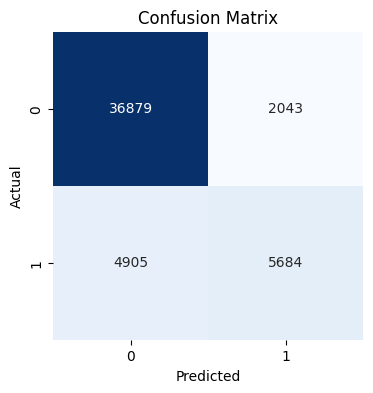

In [19]:
cm=confusion_matrix(y_test,prediction)
#ploting confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='g',cbar=False,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
model.predict(df_test)

array([0, 1, 0, ..., 0, 0, 0])